# The Sparks Foundation
## Computer Vision and IOT
## Name - Sahil Patel
### Task - 1 : Object Detection

In [1]:
import cv2 #pip install opencv-python

In [2]:
import matplotlib.pyplot as plt #pip install matplotlib

### The pre-trained tensorflow model and configuration

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] #This empty list of python includes coco dataset of 80 classes
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels) #This is 80 classes of classLabels file

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels)) #Length of the classeLabels file

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #For scaling we are converting 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) #mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 000001B578331910>

# Read an image

In [9]:
img = cv2.imread('img.jpeg') #Reads the image file

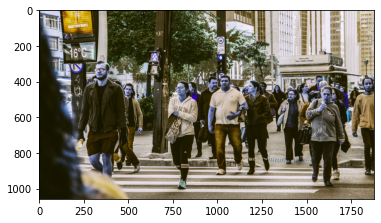

In [10]:
plt.imshow(img) #Displays the image in bgr format

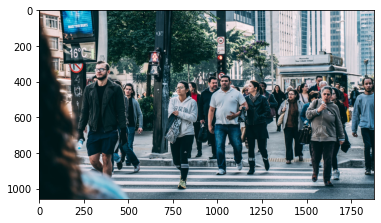

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Converting the image from BGR to RGB

In [12]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5) # The accuracy of our model is 50%

In [13]:
print(ClassIndex) #Displays the list of objects

[ 1  1  1  1  1  1 10 10  1  1]


In [14]:
font_scale = 3 #The font size
font = cv2.FONT_HERSHEY_PLAIN #The font type
for ClassInd, conf ,boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

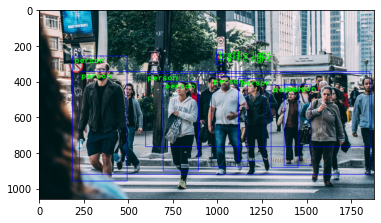

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Displays image with detected object

# Detecting Video

In [16]:
cap = cv2.VideoCapture("traffic.mp4") #Captures the video file

#Checks if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf ,boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                
    cv2.imshow('Object Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

[3 3 3]
[3 3 3 3]
[3 6 3 3 3]
[3 3 6 6]
[3 3 6 8 6]
[3 6 3 8]
[6 3 3 6 6 8]
[6 3 3 6 6 3 8]
[6 3 3 6 3]
[6 3 6 3 6]
[6 3 3 6 3]
[6 3 3 3 6]
[6 3 3 6 3]
[6 3 3 3 6]
[6 3 3 6 3]
[6 3 3 3 6 3]
[6 3 3 3]
[6 3 3 3 3]
[6 3 3 3 3]
[6 3 3 3 3]
[6 3 3 3 3]
[6 3 3 3 3]
[6 3 3 3 8]
[6 3 3 3 3 6]
[6 3 3 3 6]
[6 3 3 3 6]
[6 3 3 3 3]
[6 3 3 3 8 3]
[6 3 3 3 8 3]
[6 3 8 3 3 3 6]
[6 8 3 3 6 3]
[6 3 8 3 6 3]
[6 3 3 8 3 6 1 1]
[6 3 3 3 8 6 1 1]
[6 3 3 3 8 6 1 1]
[6 3 8 3 3]
[6 3 8 3 3]
[6 3 3 8 3]
[6 3 3 8 3]
[6 3 3 8 3 6]
[6 8 3 3 3]
[6 3 8 3 3]
[6 3 8 3]
[6 3 8 6 3]
[6 3 3 8]
[6 3 3 8 3]
[6 3 8 3]
[6 3 8 3 3 3]
[6 3 8 3 3 3]
[6 3 3 3 3 6 8 6 6]
[6 3 3 3 3 6 8]
[6 3 3 6 3 6 3]
[6 3 3 3 6 6 3]
[6 3 3 3 6]
[3 6 3 6]
[3 6 6]
[3 6 3 6]
[3 6 3 6]
[3 3 6 6]
[3 6 6 3]
[6 3 3 3]
[6 3 3 3]
[6 3 3 1 3]
[6 1 3 6 3]
[1 3 6 3 6]
[1 6 3 3]
[1 3 6]
[1 3 6]
[1 3 6]
[1 3 6]
[1 3 6]
[1 3 6]
[3 6 6]
[3 6 6]
[6 3 6]
[6 3 6 3]
[6 3 6 3]
[6 6 3 6 3]
[6 6 3 6 3]
[6 6 3 3 6 3]
[6 6 3 6 1 3 3]
[6 6 6 3 3 1 3 1]
[6 6 6 3 1 3]
[6

<function destroyAllWindows>

#                                                    Thank you